<h1 style="text-align:center">Travail pratique numérique en thermodynamique statistique</h1>
<h2 style="text-align:center">PARTIE 1 : Cinétique des gaz parfaits</h2>

Veuillez indiquer le nom des membres de votre équipe dans la cellule suivante.

**Équipe des écureuils volants** :

Félix Desroches, Anabelle Dompierre Dauphin, Camille Lessard et Mathieu Marquis

# Introduction #
Ce travail révise d'abord quelques bases générales de mécanique statistique classique avec le script `tds2Danimation_hXX.py` qui simule la théorie cinétique des gaz parfaits en 2D. Cette simulation utilise le concept de sphères dures, mais ici pour le cas des particules d'un gaz afin d'introduire des collisions élastiques entre elles sur leur trajectoire ballistique. Notez qu'une sphère est colorée et grossie seulement pour l’effet visuel dans l'animation, la physique de l’algorithme codé considère bien des particules totalement identiques. Les questions sur cette simulation, à répondre directement dans les cellules du carnet _(Notebook)_ ici-même, explorent quelques paramètres de la thermodynamique statistique et introduisent de nouveaux termes utiles à l'étude du mouvement des électrons dans la matière.

_N.B._ 
- _Pour montrer les animations à l'écran, le script `tds2Danimation_hXX.py` importe la librairie `VPython` qu'il faut donc installer. Des liens vers sa documentation et de l'information complémentaire sont donnés dans la médiagraphie à la fin._
- _Le code dans ce script est abusivement commenté dans notre contexte pédagogique, mais il serait bien sûr préférable de s’en tenir aux recommandations du <a href="https://www.python.org/dev/peps/pep-0008"> PEP 8 — Style Guide for Python Code</a>._
- _Notez finalement que la boucle principale à la fin du script laisse l'utilisateur voir l'animation aussi longtemps que souhaité, assurez-vous donc de savoir comment l'interrompre correctement avant de lancer la simulation ou de la remplacer par une boucle `for`._

# 1<sup>re</sup> partie - Cinétique CLASSIQUE des gaz parfaits #

### Simulation 2D ###

In [13]:
# %run thermodynamique_statistique/tds2Danimation_h25.py
import numpy as np
import graphinglib as gl

DIM = 2 # Nombre de degrés de liberté de la simulation 
mass = 4E-3/6E23 # helium mass
k = 1.4E-23 # Boltzmann constant
targeted_particle = np.loadtxt("thermodynamique_statistique/data/part_1_targeted_particle.csv", delimiter=",")
p_squared_norm = np.loadtxt("thermodynamique_statistique/data/part_1_p_squared_norm.csv", delimiter=",")

### Questions statistiques ###

**I.** _(3 points)_  &mdash; Utilisez la liste finale des vecteurs de quantité de mouvement $\vec{p}$ de toutes les sphères pour calculer la moyenne de son carré $\langle p^2\rangle=\langle\vec{p}\cdot\vec{p}\rangle$ en écrivant le code nécessaire dans la cellule qui suit. 

In [14]:
# Calcul de la moyenne de p² QUESTION 1
p2_avg = np.average(p_squared_norm)

print(f"⟨p²⟩ = {p2_avg} kg²·m²/s²")

⟨p²⟩ = 5.6e-47 kg²·m²/s²



**II.** _(2 points)_  &mdash; La température $T$ (macroscopique) est proportionnelle à l'énergie cinétique moyenne $E_{cin}$ de l'ensemble des particules lorsque ce système est rendu à l'équilibre. Celle-ci peut se calculer classiquement selon son <a href="https://fr.wikipedia.org/wiki/%C3%89quipartition_de_l%27%C3%A9nergie">principe d'équipartition</a>, _i.e._ en répartissant l'énergie également sur chaque degré de liberté ici en translation seulement d'où, au total pour $\text{DIM}=1,2\text{ ou } 3$ dimensions d'espace réel,
\begin{equation}
E_{cin}=\frac{\langle p^2 \rangle}{2m}=\text{DIM}\times\frac{1}{2}k_BT
\end{equation}
avec $k_B$, la constante de Boltzmann et $m$, la masse de chaque particule. Quelle est la température du gaz de sphères dures à la fin de la simulation? Est-ce qu'elle a changé significativement par rapport à sa valeur initiale?

In [15]:
# Température du gaz de *SPHÈRES DURES* à la fin de la simulation QUESTION 2
T_gaz = p2_avg / (DIM * k * mass)

print(f"La température simulée T={T_gaz:.2f} K n'a pas variée significativement relativement à la valeur initiale")

La température simulée T=300.00 K n'a pas variée significativement relativement à la valeur initiale


**III.** _(10 points)_ &mdash; Modifiez le code de la simulation pour ajouter une fonction qui suit la trajectoire d'UNE SEULE particule, c'est-à-dire qu'elle doit enregistrer, dans une liste, des valeurs de variables pour cette particule et ce, à chacune de ses collisions avec une autre particule (_i.e._ excluez les collisions avec les parois de la boîte). Les deux variables scalaires à lister sont:
- la distance que la particule a parcouru entre chaque collision,
- le temps écoulé entre ces collisions.

Copiez le code de votre fonction dans la cellule qui suit en y commentant clairement les variables pour ces listes qui devront persister après avoir interrompu l'exécution de la simulation. N'oubliez pas d'inclure votre fichier Python (`.py`) modifié avec la simulation complète lors de la remise.

In [16]:
target_part_i = 0 # index of the particle whose displacement will be saved at each colision
target_part = np.zeros((1,4)) # starting array to save the targeted particle's displacement
last_step = 0
def follow_particle(step):
    global target_part, targeted_particle_index, dt, last_step, p
    target_part = np.vstack((
        target_part, 
        np.array(
            [mass, p[target_part_i].x, p[target_part_i].y, p[target_part_i].z]
        ) / mass * (step-last_step) * dt
    ))
    last_step = step
    # La variable target_part doit persister après la simulation puisqu'elle contient l'ensemble des distances
    # parcourues et le temps entre chaque collision

**IV.** _(2 points)_ &mdash; Calculez le **libre parcours moyen** $l_{moy}$ et le **temps de collision** $\tau$ qui sont les valeurs moyennes des deux listes compilées au numéro précédent.

_(Pour votre information, le libre parcours moyen est de l’ordre de 100 nm dans l'air à température et pression ambiantes, mais_ $l_{moy}$ _peut dépasser 100 000 km dans une enceinte sous vide avec les technologies de pompes modernes!)_



In [17]:
tau = np.average(targeted_particle[:, 0])
lmoy = np.average(np.linalg.norm(targeted_particle[:, 1:], axis=1))
print(f"Le temps de collision est τ={tau:.5f} et le libre parcours moyen est l_moy="+f"{lmoy:.5f}")

Le temps de collision est τ=0.00005 et le libre parcours moyen est l_moy=0.05324


**V.** _(2 points)_ Calculez la vitesse $\vec{v}$ de la particule entre chaque paire de collisions. Quelle est la vitesse moyenne $\langle\vec{v}\rangle$ de la particule?

In [18]:
v_array = targeted_particle[:, 1:]/np.expand_dims(targeted_particle[:,0], 1)
vmoy = np.average(v_array, axis=0)
print(f"La vitesse moyenne de la particule entre les collisions est v_moy={vmoy}")
print("La vitesse de la particule entre chaque paire de collisions est, en unités arbitraires :")
print(v_array)

La vitesse moyenne de la particule entre les collisions est v_moy=[0.55617155 4.5125115  0.        ]
La vitesse de la particule entre chaque paire de collisions est, en unités arbitraires :
[[ 1046.55915225   405.84965301     0.        ]
 [ 1046.55915225   405.84965301     0.        ]
 [-1122.32801712   147.59317136     0.        ]
 ...
 [  268.14802774   -80.87673041     0.        ]
 [  268.14802774   -80.87673041     0.        ]
 [  268.14802774   -80.87673041     0.        ]]


**VI.** _(5 points)_ &mdash; Pour cette même liste de vitesses, comparez les distributions de la norme $||\vec{v}||$, du carré $v^2$ et d’une de ses composantes $v_x^2$ en étalonnant l’abscisse pour contraster les histogrammes avec une échelle appropriée. Indiquez sur ce graphique la moyenne, le mode, la médiane et la moyenne quadratique des distributions.

Norme de la vitesse [u. arb.] : moyenne=1037.62, médiane=964.37, rms=1167.05, mode=854.51
Norme au carré de la vitesse [u. arb.²] : moyenne=1361994.73, médiane=930007.08, rms=1924370.15, mode=444086.67
Carré de la vitesse en x [u. arb.²] : moyenne=662098.15, médiane=287746.62, rms=1172380.11, mode=351968.55


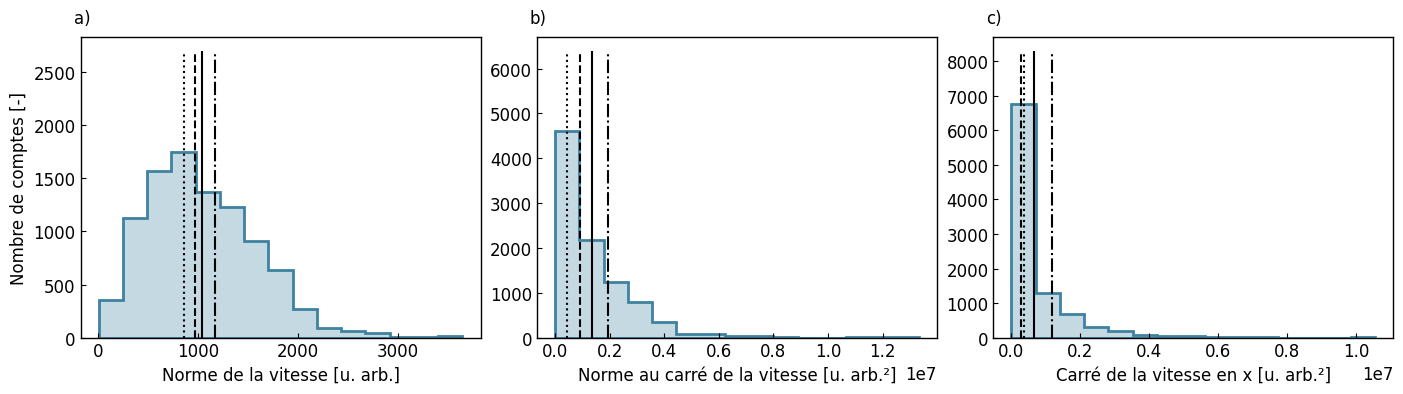

In [19]:
v_norm = np.linalg.norm(v_array, axis=1)
v_norm_squared = v_norm**2
v_x_squared = v_array[:, 0]**2
find_stats = lambda h: [h.mean, np.median(h.data), np.sqrt(np.mean(h.data**2)), 
                        h.bin_centers[np.argmax(np.histogram(h.data, bins=15)[0])]]

v_norm_fig = gl.Figure(y_label="Nombre de comptes [-]", x_label="Norme de la vitesse [u. arb.]")
v_norm_squared_fig = gl.Figure(x_label="Norme au carré de la vitesse [u. arb.²]")
v_x_squared_fig = gl.Figure(x_label="Carré de la vitesse en x [u. arb.²]")

fig_list = [v_norm_fig, v_norm_squared_fig, v_x_squared_fig]
for i, array in enumerate([v_norm, v_norm_squared, v_x_squared]):
    hist = gl.Histogram(array, number_of_bins=15, normalize=False, show_params=False)
    vlines = gl.Vlines(find_stats(hist), y_min=0, y_max=1.1*max(np.histogram(array, bins=10)[0]),
                       line_styles=["-", "--", "-.", ":"], line_widths=[1.5])
    fig_list[i].add_elements(hist, vlines)
    print(f"{fig_list[i].x_axis_name} : "
          f"moyenne={vlines.x[0]:.2f}, médiane={vlines.x[1]:.2f}, rms={vlines.x[2]:.2f}, mode={vlines.x[3]:.2f}")

multifig = gl.MultiFigure.from_row(fig_list, size=(14,4))
multifig.show()


Dans les graphiques précédentes, les lignes pleines représentent la moyenne, les lignes en tiret représentent les médianes, les lignes en points et tirets représentent la moyenne quadratique et les lignes pointillées représentent les modes.

**Bonus.** _(4 points)_ &mdash; Montrez que 
- (a) le théorème central limite est satisfait par une des distributions de vitesse du numéro précédent,
- (b) le système simulé est ergodique.

a) Parmi les options de la question VI, la norme de la vitesse s’approche le plus d’une distribution gaussienne, mais sa forme est plus cohérente avec la distribution de Maxwell-Boltzman. Cependant, si on néglige le carré sur le calcul des composantes, les distributions de v_x et v_y suivent très bien une distribution gaussienne, respectant ainsi le théorème central limite. Cette correspondance est illustrée par la régression d'une fonction normale sur les distributions, tel que présenté plus bas.

b) La très grande similarité entre la distribution des vitesses de plusieurs particules à un temps donné et la distribution des vitesses d'une seule particule à plusieurs moments montre qu'il est possible de subdiviser le système en petites parties afin d'obtenir une moyenne statistique équivalente à une moyenne sur un grand nombre de mesures. Ainsi, la similarité des distributions et de leurs moyennes montre l'ergodicité du système simulé.

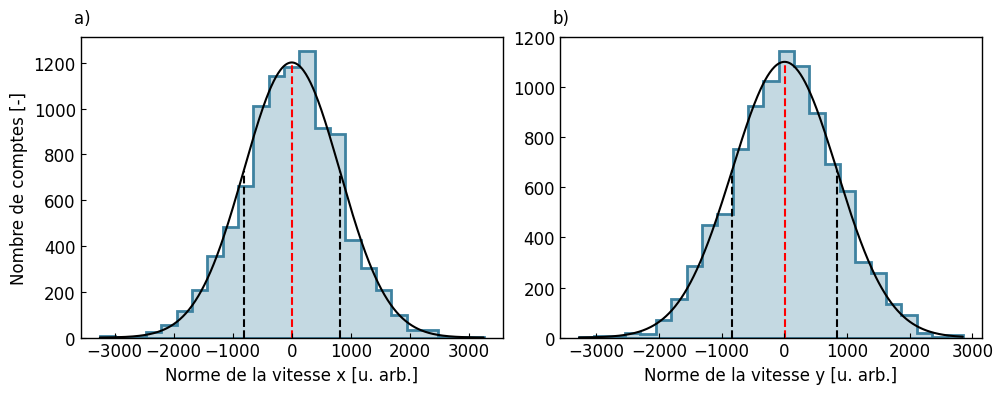

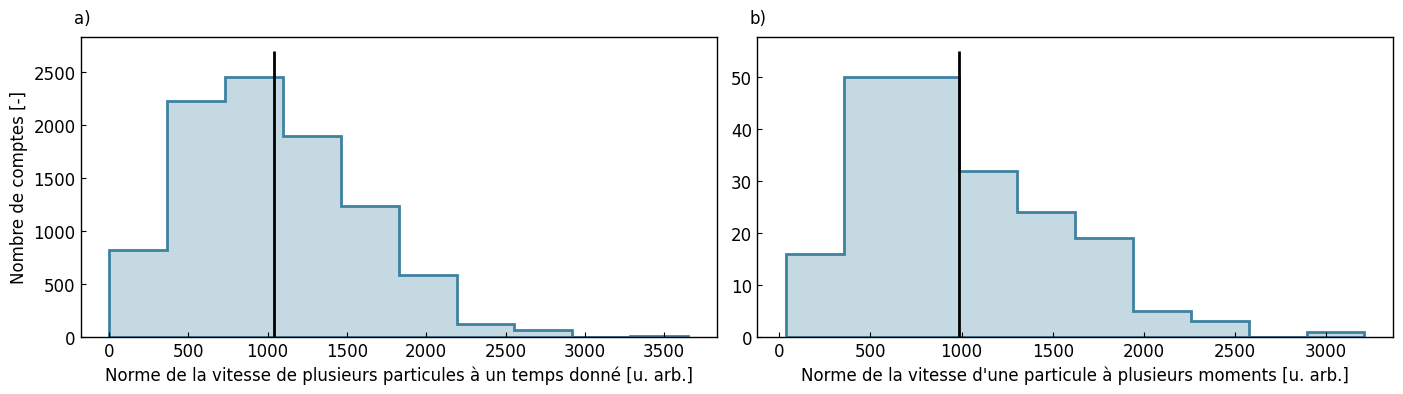

In [20]:
a_figs = []
for i in [0,1]:
    a_figs.append(gl.Figure(x_label=f"Norme de la vitesse {["x", "y"][i]} [u. arb.]"))
    hist = gl.Histogram(v_array[:,i], number_of_bins=25, normalize=False, show_params=False)
    hist.add_pdf()
    a_figs[-1].add_elements(hist)
a_figs[0].y_axis_name = "Nombre de comptes [-]"
a_multifig = gl.MultiFigure.from_row(a_figs, size=(10,4))
a_multifig.show()


t_cst_v_norm = np.sqrt(p_squared_norm)/mass
many_particles_fig = gl.Figure(y_label="Nombre de comptes [-]",
                               x_label="Norme de la vitesse de plusieurs particules à un temps donné [u. arb.]")
many_times_fig = gl.Figure(x_label="Norme de la vitesse d'une particule à plusieurs moments [u. arb.]")

fig_list = [many_particles_fig, many_times_fig]
for i, array in enumerate([v_norm, t_cst_v_norm]):
    hist = gl.Histogram(array, number_of_bins=10, normalize=False, show_params=False)
    fig_list[i].add_elements(hist, gl.Vlines([np.mean(array)], y_min=0, y_max=1.1*max(np.histogram(array, bins=10)[0])))

multifig = gl.MultiFigure.from_row([many_particles_fig, many_times_fig], size=(14,4))
multifig.show()

# Médiagraphie #
 - La simulation utilise la librairie <a href="https://vpython.org">VPython</a> conçue pour la visualisation de physique en 3D, avec les instructions d’installation <a href="https://vpython.org/presentation2018/install.html">ici</a> et la documentation <a href="https://www.glowscript.org/docs/VPythonDocs/index.html">ici</a>. Le script fourni qui est exécuté dans ce _Notebook_ adapte en 2D et commente en détail l’exemple <a href="https://www.glowscript.org/#/user/GlowScriptDemos/folder/Examples/program/HardSphereGas-VPython">HardSphereGas-VPython</a> du site interactif <a href="https://www.glowscript.org">GlowScript</a> pour programmer des animations avec VPython directement en ligne.
 
_**N.B. de débogage VPython:** Ayant plus codé en MATLAB qu'en Python jusqu'à maintenant, j'utilise Spyder qui offre une interface similaire, mais j'ai trouvé ce vidéo qui parle d'une <a href="https://www.youtube.com/watch?v=MJiVtz4Uj7M">installation VS code</a> qui peut-être aider? N'hésitez pas à partager de meilleures alternatives que j'ajouterai ici. Vous pouvez aussi tenter l'installation <a href="https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/">directement dans le Notebook</a>, mais au final chaque installation de distribution Python a son lot de <a href="https://xkcd.com/2347/">défis avec les dépendances</a>. Si rien ne fonctionne, n'hésitez pas à contacter la sympathique communauté qui développe et utilise cette librairie VPython d'abord via leur <a href="https://groups.google.com/g/vpython-users">groupe-forum</a>, puis leur <a href="https://github.com/vpython/vpython-jupyter">site GitHub</a> de dépôt de développement. J'ai toujours eu de bonnes expériences d'interaction avec eux!_ 
 